Load the appropriate libraries. tensorflow for the deep learning, cv2 for the object recognition,
numpy for the dataframe of the images to be loaded, OS to load the test data.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Load the preset dataset from MNIST, which contains the training data of digits we want the model to learn from.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#preprocessing
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#Working on the neural network model, and adding the layers
model = tf.keras.models.Sequential() #Creating a sequential model

#Input layer:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #turns it into 1 dimension by multiplying the 2 dimensions

#Hidden layers:
model.add(tf.keras.layers.Dense(128, activation='relu')) #dense layer is just a basic layer where all 128 neurons are connecting using
#Rectified Linear Unit activation function which introduces nonlinearity to the model
model.add(tf.keras.layers.Dense(128, activation='relu')) #adding another dense 128 layer

#output layer:
model.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer of 10 neurons(for each digit 0-9) and softmax converts a vector of values
#to a probability distribution 

Compiling the model then train and save the model

In [3]:
#compile the model with the chosen optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Adam: a learning algorithm that adapts learning rates of each parameter. sparse_categorical_crossentropy: is classification used for labels 
#that are integers. metric chosen for monitoring is 'accuracy'

history = model.fit(x_train, y_train, epochs=3) #Train the model by iterating through it 3 times

model.save('handwritten.model') #save, so we do not need to re-run

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2604 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1058 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0723 - accuracy: 0.9776
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


Since the model has been trained and saved, we do not need to run the other cells, and thus we just load and test

In [4]:
model = tf.keras.models.load_model('handwritten.model')

Once loaded, we then create the algorithm to load the testing data into the model

1/1 [==============================] - 0s 110ms/step
True Label: 0, Predicted Label: 9


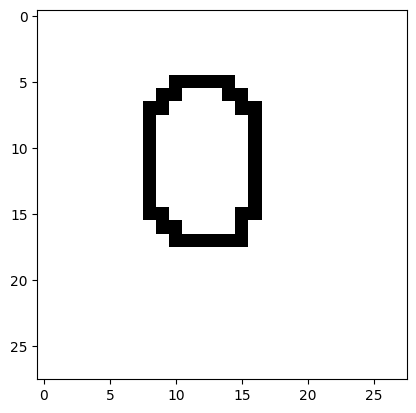

1/1 [==============================] - 0s 26ms/step
True Label: 9, Predicted Label: 2


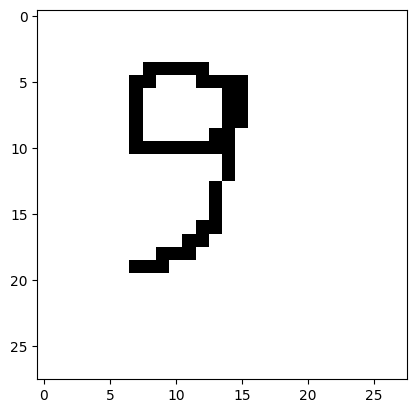

1/1 [==============================] - 0s 27ms/step
True Label: 4, Predicted Label: 4


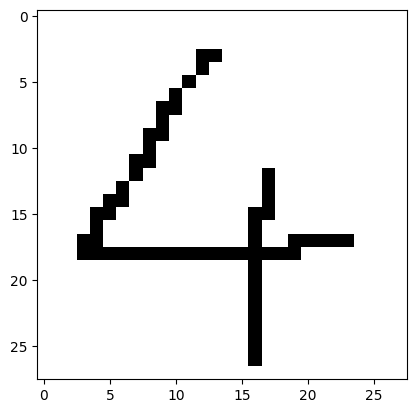

1/1 [==============================] - 0s 27ms/step
True Label: 4, Predicted Label: 4


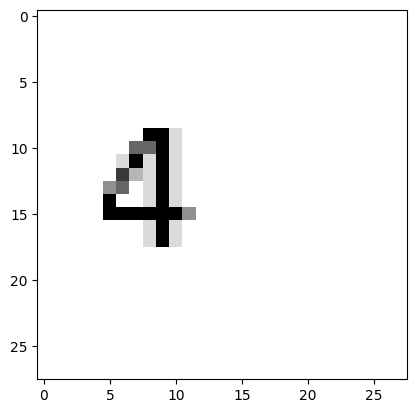

1/1 [==============================] - 0s 27ms/step
True Label: 7, Predicted Label: 9


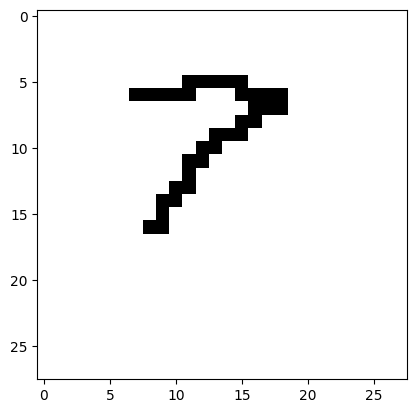

1/1 [==============================] - 0s 28ms/step
True Label: 6, Predicted Label: 6


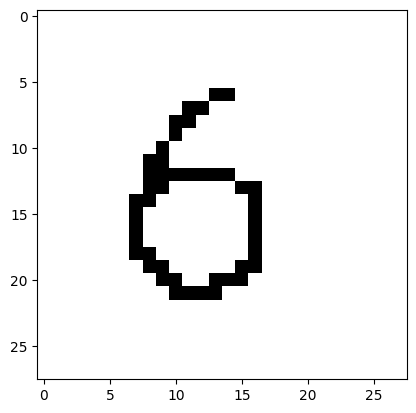

1/1 [==============================] - 0s 27ms/step
True Label: 7, Predicted Label: 7


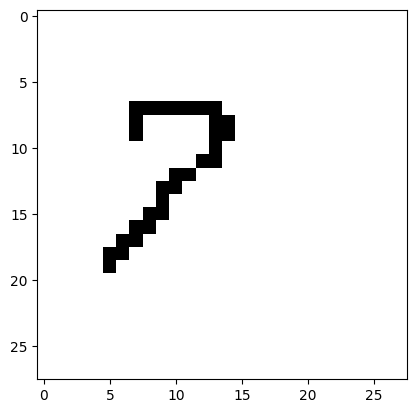

1/1 [==============================] - 0s 33ms/step
True Label: 0, Predicted Label: 0


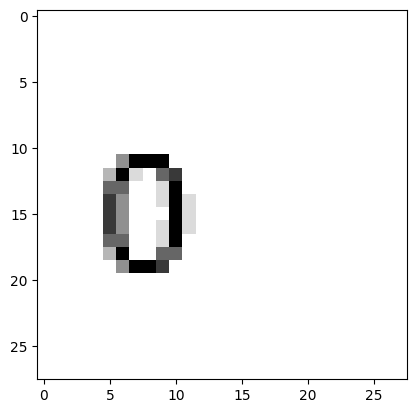

In [5]:
true_labels_mapping = {
    'digit1.png': 0,
    'digit2.png': 9,
    'digit3.png': 4,
    'digit4.png': 4,
    'digit5.png': 7,
    'digit6.png': 6,
    'digit7.png': 7,
    'digit8.png': 0
}

true_labels = []
predicted_labels = []

image_number = 1

while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:, :, 0]
        img = np.invert(np.array([img]))

        # Make a prediction
        prediction = model.predict(img.reshape(1, 28, 28))
        predicted_label = np.argmax(prediction)

        # Append true and predicted labels
        true_labels.append(true_labels_mapping[f"digit{image_number}.png"])
        predicted_labels.append(predicted_label)

        # Output the results
        print(f"True Label: {true_labels[-1]}, Predicted Label: {predicted_labels[-1]}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()

    except Exception as e:
        print(f"Could not process file: {e}")

    finally:
        image_number += 1


Data analytics of the project

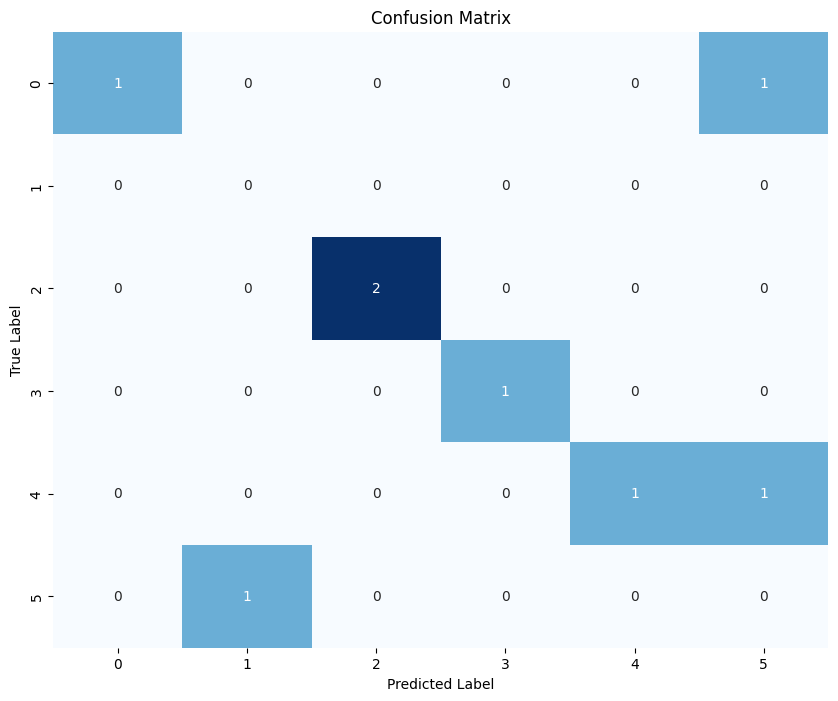

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

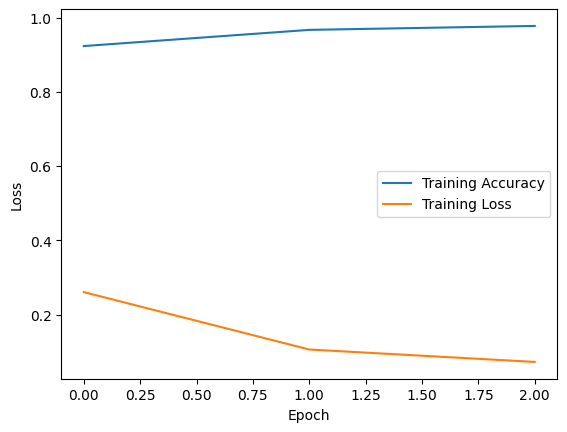

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The model scored 5/8 with 3 epochs. the learning rate was very sharp, as we see the loss decrease sharply below 10%.
The model failed to classify number 0 quite a lot during testing, and may result in the fact that the quality may be too low
even using windows font without drawing it on paint. Deep learning is a powerful tool hence the model is used a lot for many use cases
in the real world.